In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Python-cia-111.csv')

In [3]:
df.head()

,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_IN_YEARS
0,1,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33
1,1,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33
2,1,M,Y,Y,0,157500,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,Security staff,2,59
3,1,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,Sales staff,1,52
4,1,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,Sales staff,1,52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   APPROVAL             987 non-null    int64 
 1   CODE_GENDER          987 non-null    object
 2   FLAG_OWN_CAR         987 non-null    object
 3   FLAG_OWN_REALTY      987 non-null    object
 4   CNT_CHILDREN         987 non-null    int64 
 5   AMT_INCOME_TOTAL     987 non-null    int64 
 6   NAME_INCOME_TYPE     987 non-null    object
 7   NAME_EDUCATION_TYPE  987 non-null    object
 8   NAME_FAMILY_STATUS   987 non-null    object
 9   NAME_HOUSING_TYPE    987 non-null    object
 10  DAYS_EMPLOYED        987 non-null    int64 
 11  FLAG_WORK_PHONE      987 non-null    int64 
 12  FLAG_PHONE           987 non-null    int64 
 13  OCCUPATION_TYPE      987 non-null    object
 14  CNT_FAM_MEMBERS      987 non-null    int64 
 15  AGE_IN_YEARS         987 non-null    int64 
dtypes: int64

In [5]:
# Dropping and re-adding income column
DV=df.AMT_INCOME_TOTAL
df['INCOME']=DV

In [6]:
df.drop(axis=1,columns='AMT_INCOME_TOTAL',inplace=True)

In [7]:
df.head()

,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_IN_YEARS,INCOME
0,1,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33,427500
1,1,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33,427500
2,1,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,Security staff,2,59,157500
3,1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,Sales staff,1,52,270000
4,1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,Sales staff,1,52,270000


In [8]:
# dependent variable
y=df.iloc[:,15]
y.head()

0    427500
1    427500
2    157500
3    270000
4    270000
Name: INCOME, dtype: int64

In [9]:
df.corr()

,APPROVAL,CNT_CHILDREN,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,AGE_IN_YEARS,INCOME
APPROVAL,1.000000,-0.101090,0.076216,-0.102371,-0.030825,-0.131231,0.073182,-0.053465
CNT_CHILDREN,-0.101090,1.000000,-0.165190,0.015235,-0.180364,0.861336,-0.311765,-0.084705
DAYS_EMPLOYED,0.076216,-0.165190,1.000000,-0.285262,0.086931,-0.212975,0.568809,-0.192078
FLAG_WORK_PHONE,-0.102371,0.015235,-0.285262,1.000000,0.196644,0.090520,-0.222116,0.127822
FLAG_PHONE,-0.030825,-0.180364,0.086931,0.196644,1.000000,-0.060020,0.165641,-0.111865
CNT_FAM_MEMBERS,-0.131231,0.861336,-0.212975,0.090520,-0.060020,1.000000,-0.253293,-0.118784
AGE_IN_YEARS,0.073182,-0.311765,0.568809,-0.222116,0.165641,-0.253293,1.000000,-0.126167
INCOME,-0.053465,-0.084705,-0.192078,0.127822,-0.111865,-0.118784,-0.126167,1.000000


<AxesSubplot:>

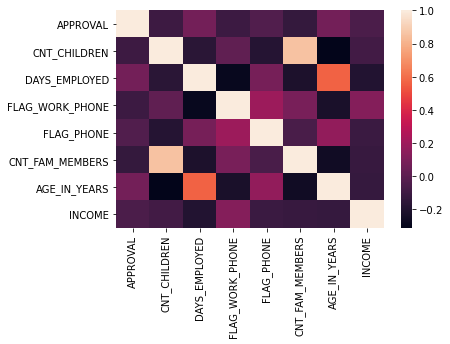

In [10]:
sns.heatmap(df.corr())

In [11]:
df.head(1)

,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_IN_YEARS,INCOME
0,1,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33,427500


In [12]:
# independent variables
x=df.iloc[:,[0,1,2,3,5,6,7,8,9,12,13,14]]
x.head()

,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_IN_YEARS
0,1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,-4542,Unknown,2,33
1,1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,-4542,Unknown,2,33
2,1,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2,59
3,1,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1,52
4,1,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1,52


In [13]:
approval_fac=pd.get_dummies(x['APPROVAL'],drop_first=True)
x=x.drop(columns='APPROVAL',axis=1)
x=pd.concat([x,approval_fac],axis=1)

gender_fac=pd.get_dummies(x['CODE_GENDER'],drop_first=True)
x=x.drop(columns='CODE_GENDER',axis=1)
x=pd.concat([x,gender_fac],axis=1)

car_fac=pd.get_dummies(x['FLAG_OWN_CAR'],drop_first=True)
x=x.drop(columns='FLAG_OWN_CAR',axis=1)
x=pd.concat([x,car_fac],axis=1)

realty_fac=pd.get_dummies(x['FLAG_OWN_REALTY'],drop_first=True)
x=x.drop(columns='FLAG_OWN_REALTY',axis=1)
x=pd.concat([x,realty_fac],axis=1)

income_fac=pd.get_dummies(x['NAME_INCOME_TYPE'],drop_first=True)
x=x.drop(columns='NAME_INCOME_TYPE',axis=1)
x=pd.concat([x,income_fac],axis=1)

education_fac=pd.get_dummies(x['NAME_EDUCATION_TYPE'],drop_first=True)
x=x.drop(columns='NAME_EDUCATION_TYPE',axis=1)
x=pd.concat([x,education_fac],axis=1)

fam_fac=pd.get_dummies(x['NAME_FAMILY_STATUS'],drop_first=True)
x=x.drop(columns='NAME_FAMILY_STATUS',axis=1)
x=pd.concat([x,fam_fac],axis=1)

house_fac=pd.get_dummies(x['NAME_HOUSING_TYPE'],drop_first=True)
x=x.drop(columns='NAME_HOUSING_TYPE',axis=1)
x=pd.concat([x,house_fac],axis=1)

occu_fac=pd.get_dummies(x['OCCUPATION_TYPE'],drop_first=True)
x=x.drop(columns='OCCUPATION_TYPE',axis=1)
x=pd.concat([x,occu_fac],axis=1)

In [14]:
x.head()

,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE_IN_YEARS,1,M,Y,Y,Pensioner,State servant,Working,...,Drivers,High skill tech staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Sales staff,Security staff,Unknown
0,-4542,2,33,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-4542,2,33,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-1134,2,59,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-3051,1,52,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-3051,1,52,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
x=sm.add_constant(x)
model=sm.OLS(y_train,x_train).fit()

In [17]:
summary=model.summary2()
print(summary)

                                Results: Ordinary least squares
Model:                       OLS                   Adj. R-squared (uncentered):      0.902     
Dependent Variable:          INCOME                AIC:                              17270.7921
Date:                        2021-09-19 19:35      BIC:                              17425.0397
No. Observations:            690                   Log-Likelihood:                   -8601.4   
Df Model:                    34                    F-statistic:                      188.0     
Df Residuals:                656                   Prob (F-statistic):               1.55e-312 
R-squared (uncentered):      0.907                 Scale:                            4.1411e+09
-----------------------------------------------------------------------------------------------
                                 Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------

In [26]:
from statsmodels.tools.eval_measures import rmse
pred_y = model.predict(x_test) 
rmse = rmse(y_test, pred_y)
round(rmse,2)

81077.75

In [25]:
# quick comparison
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})
df1.head(10)

,Actual,Predicted
712,144000,147831.413207
272,157500,183260.270355
27,270000,207906.516636
776,90000,145547.434928
753,135000,242779.864343
524,157500,40351.894822
588,157500,195509.823392
743,117000,137250.000000
969,99000,85587.472336
815,270000,283951.020134


In [27]:
model_resid=model.resid

Text(0, 0.5, 'Standardized residuals')

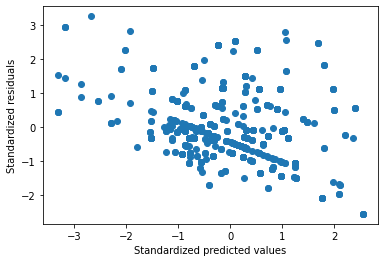

In [28]:
# HOMOSCEDASTICITY
def standardization(x):  
    return (x - x.mean())/x.std()  

plt.scatter(standardization(model.fittedvalues),standardization(model_resid)) 

plt.xlabel("Standardized predicted values") 
plt.ylabel("Standardized residuals")

# CLUSTERING

In [30]:
df.head()

,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_IN_YEARS,INCOME
0,1,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33,427500
1,1,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,Unknown,2,33,427500
2,1,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,Security staff,2,59,157500
3,1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,Sales staff,1,52,270000
4,1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,Sales staff,1,52,270000


In [31]:
df2=df.iloc[:,[4,9,13,14,15]]

In [32]:
df2.head()

,CNT_CHILDREN,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE_IN_YEARS,INCOME
0,0,-4542,2,33,427500
1,0,-4542,2,33,427500
2,0,-1134,2,59,157500
3,0,-3051,1,52,270000
4,0,-3051,1,52,270000


In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)

In [34]:
df2["clusterid"] = km.fit_predict(df2)
df2.sample(10)

<ipython-input-34-1b39f78ff1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["clusterid"] = km.fit_predict(df2)


,CNT_CHILDREN,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE_IN_YEARS,INCOME,clusterid
452,0,365243,2,55,135000,0
518,0,-3174,1,30,157500,1
603,2,-2870,4,27,135000,1
231,2,-2289,4,30,202500,1
300,0,365243,1,59,157500,0
887,0,-5457,2,41,99000,1
241,0,-2077,2,29,315000,1
529,0,-252,2,56,202500,1
604,2,-2870,4,27,135000,1
804,0,-4451,1,53,225000,1


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca_cluster=PCA(n_components=2).fit_transform(df2)

In [37]:
outcome=pd.DataFrame(pca_cluster,columns=['pca1','pca2'])
outcome.head()

,pca1,pca2
0,-95492.316847,220873.925551
1,-95492.316847,220873.925551
2,-42250.101285,-43846.457090
3,-64922.798408,66361.862465
4,-64922.798408,66361.862465


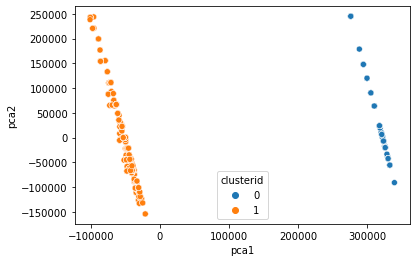

In [38]:
sns.scatterplot(x='pca1',y='pca2',hue=df2['clusterid'],data=outcome)
plt.show()